## Подключение необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as matplotlib
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

Matplotlib: 3.3.4
Seaborn: 0.11.1


In [2]:
FIGSIZE = (12,5)
FONTSIZE = 14

## Загрузка данных

In [3]:
PATH = './data/'

try:
    X = pd.read_csv(PATH+'features.csv', index_col=0)
    y = pd.read_csv(PATH+'target.csv', index_col=0)
    print('All of the data has been loaded successfully!')
except Exception as err:
    print(repr(err))
print()

All of the data has been loaded successfully!



In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2010 to 2020
Data columns (total 10 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Реальные располагаемые денежные доходы населения                                         5 non-null      float64
 1   Внешнеторговый оборот                                                                    11 non-null     float64
 2   Численность постоянного населения                                                        11 non-null     float64
 3   Инвестиции в основной капитал                                                            11 non-null     int64  
 4   Ввод в эксплуатацию жилых домов                                                          11 non-null     float64
 5   Оборот розничной торговли                                    

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2010 to 2020
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Налог на доходы физических лиц  11 non-null     float64
 1   Налог на прибыль организаций    11 non-null     float64
dtypes: float64(2)
memory usage: 264.0 bytes


In [6]:
X

,Реальные располагаемые денежные доходы населения,Внешнеторговый оборот,Численность постоянного населения,Инвестиции в основной капитал,Ввод в эксплуатацию жилых домов,Оборот розничной торговли,Объем платных услуг населению,Фонд заработной платы,"Численность безработных, зарегистрированных в службах занятости",Уровень зарегистрированной безработицы (к численности экономически активного населения)
Год,,,,,,,,,,
2010,100.00,1305.00,679.80,19600,150.00,73500,24500,68900,12.60,3.30
2011,101.00,1527.00,677.70,27450,145.00,71400,21800,66200,12.70,3.39
2012,102.00,1995.00,633.50,38610,240.00,89600,24500,72760,9.90,2.66
2013,103.00,2070.00,633.10,44420,299.10,100000,31700,85400,8.20,2.30
2014,102.00,1440.00,631.40,47400,225.00,111000,32600,96500,7.50,2.27
2015,NaN,1513.00,628.20,43890,238.00,116000,35400,90100,6.90,2.21
2016,NaN,1079.80,623.90,43750,252.00,112000,39700,91300,7.50,2.33
2017,NaN,865.00,622.30,44560,260.00,127200,37600,90600,7.80,2.41
2018,NaN,1067.70,619.00,47300,280.00,124800,36600,89700,6.88,2.13


In [7]:
y

,Налог на доходы физических лиц,Налог на прибыль организаций
Год,,
2010,8415764100.00,971518000.00
2011,8033981768.00,3350000000.00
2012,9351989850.00,5619500000.00
2013,10207986563.00,6088000000.00
2014,11252026928.00,3563000000.00
2015,11452230385.89,2950636000.00
2016,7865385000.00,4483000000.00
2017,11304320582.21,5204100000.00
2018,11865117341.00,4634560000.00


Объединим признаки и целевой признак

In [8]:
df = pd.concat([X, y], axis=1)
df

,Реальные располагаемые денежные доходы населения,Внешнеторговый оборот,Численность постоянного населения,Инвестиции в основной капитал,Ввод в эксплуатацию жилых домов,Оборот розничной торговли,Объем платных услуг населению,Фонд заработной платы,"Численность безработных, зарегистрированных в службах занятости",Уровень зарегистрированной безработицы (к численности экономически активного населения),Налог на доходы физических лиц,Налог на прибыль организаций
Год,,,,,,,,,,,,
2010,100.00,1305.00,679.80,19600,150.00,73500,24500,68900,12.60,3.30,8415764100.00,971518000.00
2011,101.00,1527.00,677.70,27450,145.00,71400,21800,66200,12.70,3.39,8033981768.00,3350000000.00
2012,102.00,1995.00,633.50,38610,240.00,89600,24500,72760,9.90,2.66,9351989850.00,5619500000.00
2013,103.00,2070.00,633.10,44420,299.10,100000,31700,85400,8.20,2.30,10207986563.00,6088000000.00
2014,102.00,1440.00,631.40,47400,225.00,111000,32600,96500,7.50,2.27,11252026928.00,3563000000.00
2015,NaN,1513.00,628.20,43890,238.00,116000,35400,90100,6.90,2.21,11452230385.89,2950636000.00
2016,NaN,1079.80,623.90,43750,252.00,112000,39700,91300,7.50,2.33,7865385000.00,4483000000.00
2017,NaN,865.00,622.30,44560,260.00,127200,37600,90600,7.80,2.41,11304320582.21,5204100000.00
2018,NaN,1067.70,619.00,47300,280.00,124800,36600,89700,6.88,2.13,11865117341.00,4634560000.00


In [9]:
df.iloc[:,:5]

,Реальные располагаемые денежные доходы населения,Внешнеторговый оборот,Численность постоянного населения,Инвестиции в основной капитал,Ввод в эксплуатацию жилых домов
Год,,,,,
2010,100.00,1305.00,679.80,19600,150.00
2011,101.00,1527.00,677.70,27450,145.00
2012,102.00,1995.00,633.50,38610,240.00
2013,103.00,2070.00,633.10,44420,299.10
2014,102.00,1440.00,631.40,47400,225.00
2015,NaN,1513.00,628.20,43890,238.00
2016,NaN,1079.80,623.90,43750,252.00
2017,NaN,865.00,622.30,44560,260.00
2018,NaN,1067.70,619.00,47300,280.00


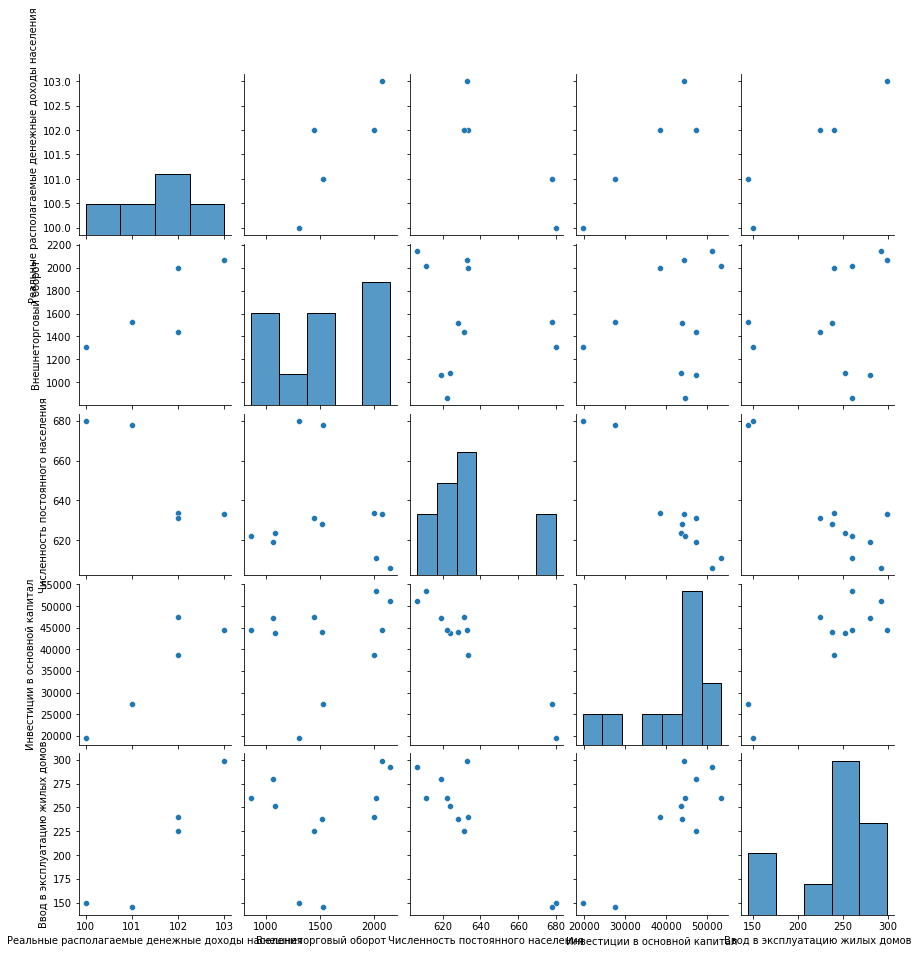

In [10]:
sns.pairplot(df.iloc[:,:5])

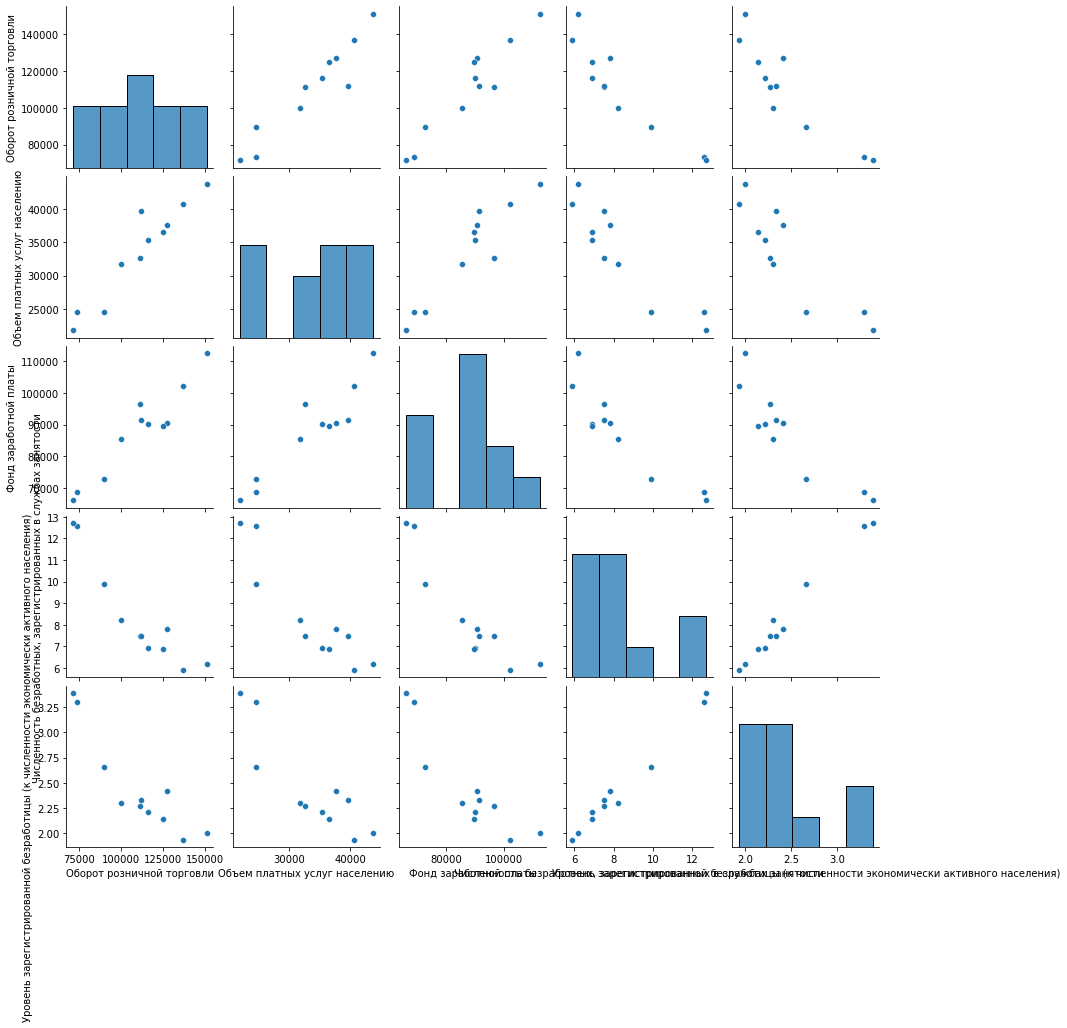

In [11]:
sns.pairplot(df.iloc[:,5:10])

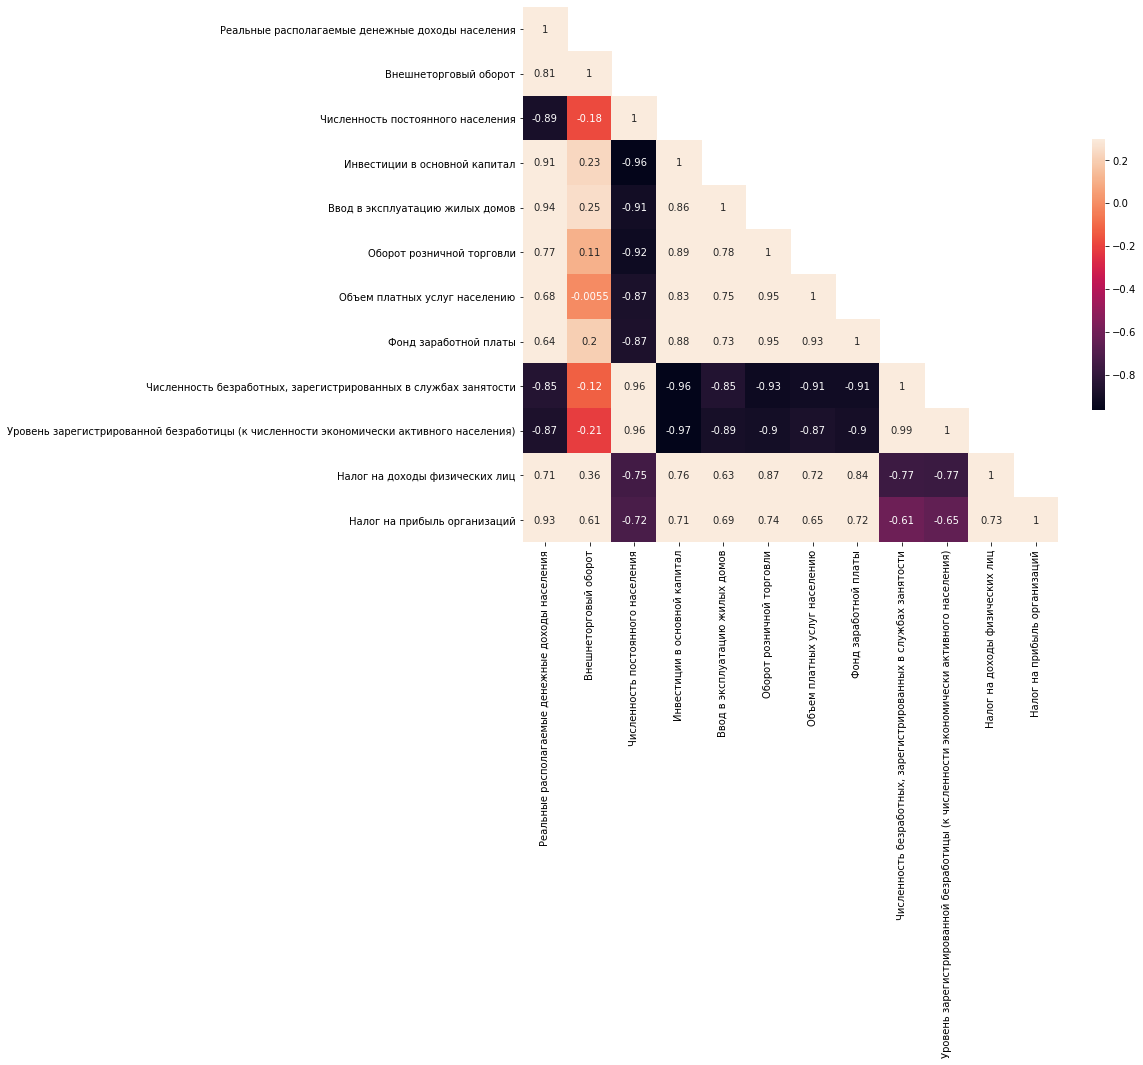

In [12]:
corrMatrix = df.corr(method='pearson', min_periods=1)
plt.figure(figsize=(12,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool), k=1)
ax = sns.heatmap(corrMatrix, square=True, vmax=.3, annot=True, mask=mask, cbar_kws={"shrink": .5})
plt.show()

In [13]:
X_train, X_test = X[:8], X[8:]
y_train, y_test = y[:8], y[8:]

In [14]:
from sklearn.linear_model import LinearRegression

def predict(X_train=None, y_train=None, X_test=None):
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [15]:
predicted = predict(X_train, y_train.iloc[:,0], X_test)

In [16]:
predicted

array([1.09378480e+10, 1.51462230e+10, 1.88253498e+10])

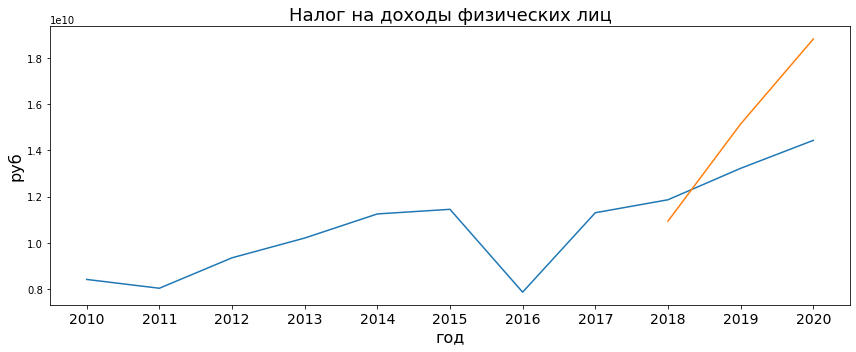

In [20]:
width = 0.4  # the width of the bars
xt = np.arange(len(X.index))

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(xt, y.iloc[:,0])
ax.plot(xt[-3:], predicted)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('руб', fontsize=FONTSIZE+2)
ax.set_xlabel('год', fontsize=FONTSIZE+2)

ax.set_title('Налог на доходы физических лиц', fontsize=FONTSIZE+4)
ax.set_xticks(xt)
ax.set_xticklabels([str(y) for y in X.index], fontsize=FONTSIZE)
# #ax.set_yticklabels(fontsize=FONTSIZE)
# ax.legend()

fig.tight_layout()

plt.show()